In [229]:
# Librerías necesarias
import pandas as pd
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split, RepeatedKFold
import numpy as np
import pandas as pd
import os
import pickle
import warnings

from datetime import datetime
from concurrent.futures import ProcessPoolExecutor, as_completed
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn import tree

import matplotlib.pyplot as plt



import re
from scores import *

In [230]:
df1 = pd.read_csv("./resultados/resultados_media_binarios7_2025_06_06_09_04_23.csv")
df2 = pd.read_csv("./resultados/resultados_media_binarios7_2025_06_07_13_39_35.csv")
df3 = pd.read_csv("./resultados/resultados_media_binarios7_2025_06_07_08_09_40.csv")
df_media = pd.concat([df1, df2, df3]).reset_index(drop=True)
df_media.to_csv('./resultados/medias.csv', index=False)

df1 = pd.read_csv("./resultados/resultados_binarios7_2025_06_06_09_04_23.csv")
df2 = pd.read_csv("./resultados/resultados_binarios7_2025_06_07_13_39_35.csv")
df3 = pd.read_csv("./resultados/resultados_binarios7_2025_06_07_08_09_40.csv")
df_totales = pd.concat([df1, df2, df3]).reset_index(drop=True)
df_totales.to_csv('./resultados/totales.csv', index=False)

In [231]:


# file_path = "./resultados/resultados_media_binarios7_2025_06_05_16_17_46.csv"
# file_path_todo = "./resultados/resultados_binarios7_2025_06_05_16_17_46.csv"

file_path = './resultados/medias.csv'
file_path_todo = './resultados/totales.csv'

# Tabla Medias

In [232]:
df_totales.columns

Index(['dataset', 'nrows', 'ncols', 'run', 'seed', 'i_5CV_logloss',
       'p_5CV_logloss', 'i_TST_logloss', 'p_TST_logloss', 'i_geo_complexity',
       'p_geo_complexity', 'i_nfs_complexity', 'p_nfs_complexity',
       'i_best_model', 'p_best_model', 'i_d', 'p_d', 'i_l', 'p_l', 'i_f',
       'p_f', 'i_tree_nfs', 'p_tree_nfs', 'i_tree_used_fs', 'p_tree_used_fs',
       'i_selected_fs', 'p_selected_fs'],
      dtype='object')

In [233]:
# Cargar el archivo CSV
# file_path = "./resultados/resultados_media_binarios4_2025_06_02_14_42_34.csv"
#file_path = "./resultados/resultados_media_binarios5_2025_06_04_10_07_21.csv"
# file_path = "./resultados/resultados_media_binarios7_2025_06_05_16_17_46.csv"
df = pd.read_csv(file_path)
df_orig = df.copy()

# Eliminar ".csv" de los nombres de dataset
df["dataset"] = df["dataset"].str.replace(".csv", "", regex=False)

# Redondear y formatear columnas según lo solicitado
df["i_5CV_logloss"] = df["i_5CV_logloss"].round(3)
df["p_5CV_logloss"] = df["p_5CV_logloss"].round(3)
df["i_TST_logloss"] = df["i_TST_logloss"].round(3)
df["p_TST_logloss"] = df["p_TST_logloss"].round(3)

df["i_geo_complexity"]  = df["i_geo_complexity"] / 1e6
df["i_geo_complexity"] = df["i_geo_complexity"].round(1)

df["p_geo_complexity"]  = df["p_geo_complexity"] / 1e6
df["p_geo_complexity"] = df["p_geo_complexity"].round(1)

df["i_d"] = df["i_d"].round(1)
df["p_d"] = df["p_d"].round(1)
df["i_l"] = df["i_l"].round(1)
df["p_l"] = df["p_l"].round(1)
df["i_f"] = df["i_f"].round(1)
df["p_f"] = df["p_f"].round(1)

df["nrows"] = df["nrows"].astype(int)
df["ncols"] = df["ncols"].astype(int)

# Ordenar por número de columnas
df_ordenado = df.sort_values(by="ncols")

# Construir un DataFrame limpio con las columnas ya procesadas y formateadas
df_final = df_ordenado[[
    "dataset", "nrows", "ncols",
    "i_5CV_logloss", "p_5CV_logloss",
    "i_TST_logloss", "p_TST_logloss",
    "i_geo_complexity", "p_geo_complexity",
    "i_d", "p_d", "i_l", "p_l", "i_f", "p_f",
]].copy()

df_final = df_final.reset_index(drop=True)
df_final

,dataset,nrows,ncols,i_5CV_logloss,p_5CV_logloss,i_TST_logloss,p_TST_logloss,i_geo_complexity,p_geo_complexity,i_d,p_d,i_l,p_l,i_f,p_f
0,Titanic,2201,4,0.538,0.539,0.551,0.552,5.3,4.8,3.9,3.8,8.3,7.7,3.0,2.9
1,MagicTelescope,19020,11,0.453,0.453,0.456,0.458,8.2,7.9,4.0,4.0,15.3,15.2,5.4,5.2
2,credit,16714,11,0.505,0.505,0.508,0.508,7.5,7.5,4.0,4.0,13.5,13.8,4.3,4.2
3,eeg,14980,15,0.592,0.592,0.594,0.593,7.8,7.9,4.0,4.0,13.5,13.7,6.8,6.8
4,compas,5278,20,0.616,0.616,0.618,0.618,11.7,11.9,4.0,4.0,14.2,14.3,2.9,2.3
5,Long,4477,20,0.175,0.176,0.171,0.173,6.5,6.6,4.0,3.9,10.6,10.6,2.0,2.0
6,law,20800,20,0.000,0.000,0.000,0.000,2.0,2.1,1.0,1.1,2.0,2.1,1.0,1.1
7,ringnorm,7400,21,0.504,0.505,0.523,0.523,6.4,6.4,4.0,4.0,9.4,9.6,4.4,4.2
8,twonorm,7400,21,0.478,0.478,0.499,0.499,11.6,12.1,4.0,4.0,16.0,15.8,5.0,4.6
9,jm1,10885,22,0.614,0.612,0.614,0.614,8.9,10.1,3.8,3.9,11.0,13.1,4.9,4.3


In [234]:
# Crear una copia para formatear como strings
df_tex = df_final.copy()

# Formatear columnas numéricas a strings con el formato deseado
df_tex["nrows"] = df_tex["nrows"].astype(str)
df_tex["ncols"] = df_tex["ncols"].astype(str)
df_tex["i_5CV_logloss"] = df_tex["i_5CV_logloss"].map("{:.3f}".format)
df_tex["p_5CV_logloss"] = df_tex["p_5CV_logloss"].map("{:.3f}".format)
df_tex["i_TST_logloss"] = df_tex["i_TST_logloss"].map("{:.3f}".format)
df_tex["p_TST_logloss"] = df_tex["p_TST_logloss"].map("{:.3f}".format)
df_tex["i_geo_complexity"] = df_tex["i_geo_complexity"].map("{:.1f}".format)
df_tex["p_geo_complexity"] = df_tex["p_geo_complexity"].map("{:.1f}".format)
df_tex["i_d"] = df_tex["i_d"].map("{:.1f}".format)
df_tex["p_d"] = df_tex["p_d"].map("{:.1f}".format)
df_tex["i_l"] = df_tex["i_l"].map("{:.1f}".format)
df_tex["p_l"] = df_tex["p_l"].map("{:.1f}".format)
df_tex["i_f"] = df_tex["i_f"].map("{:.1f}".format)
df_tex["p_f"] = df_tex["p_f"].map("{:.1f}".format)
# Ahora imprime la tabla en LaTeX con los valores ya formateados
print(df_tex.to_latex(index=False, escape=False))


\begin{tabular}{lllllllllllllll}
\toprule
dataset & nrows & ncols & i_5CV_logloss & p_5CV_logloss & i_TST_logloss & p_TST_logloss & i_geo_complexity & p_geo_complexity & i_d & p_d & i_l & p_l & i_f & p_f \\
\midrule
Titanic & 2201 & 4 & 0.538 & 0.539 & 0.551 & 0.552 & 5.3 & 4.8 & 3.9 & 3.8 & 8.3 & 7.7 & 3.0 & 2.9 \\
MagicTelescope & 19020 & 11 & 0.453 & 0.453 & 0.456 & 0.458 & 8.2 & 7.9 & 4.0 & 4.0 & 15.3 & 15.2 & 5.4 & 5.2 \\
credit & 16714 & 11 & 0.505 & 0.505 & 0.508 & 0.508 & 7.5 & 7.5 & 4.0 & 4.0 & 13.5 & 13.8 & 4.3 & 4.2 \\
eeg & 14980 & 15 & 0.592 & 0.592 & 0.594 & 0.593 & 7.8 & 7.9 & 4.0 & 4.0 & 13.5 & 13.7 & 6.8 & 6.8 \\
compas & 5278 & 20 & 0.616 & 0.616 & 0.618 & 0.618 & 11.7 & 11.9 & 4.0 & 4.0 & 14.2 & 14.3 & 2.9 & 2.3 \\
Long & 4477 & 20 & 0.175 & 0.176 & 0.171 & 0.173 & 6.5 & 6.6 & 4.0 & 3.9 & 10.6 & 10.6 & 2.0 & 2.0 \\
law & 20800 & 20 & 0.000 & 0.000 & 0.000 & 0.000 & 2.0 & 2.1 & 1.0 & 1.1 & 2.0 & 2.1 & 1.0 & 1.1 \\
ringnorm & 7400 & 21 & 0.504 & 0.505 & 0.523 & 0.523 &

# Tabla Diferencias

In [235]:

df = df_orig.copy()

# Definir los pares a comparar
pares = [
    ("i_5CV_logloss", "p_5CV_logloss"),
    ("i_TST_logloss", "p_TST_logloss"),
    ("i_geo_complexity", "p_geo_complexity"),
    ("i_d", "p_d"),
    ("i_l", "p_l"),
    # ("i_f", "p_f"),
    ("i_tree_nfs", "p_tree_nfs"),
]

# Calcular métricas y almacenar resultados
resultados = []

for col_i, col_p in pares:
    menor = (df_orig[col_i].round(3) < df[col_p].round(3)).mean() * 100
    igual = (df[col_i].round(3) == df[col_p].round(3)).mean() * 100
    mayor = (df[col_i].round(3) > df[col_p].round(3)).mean() * 100
    stat, pval = ttest_rel(df[col_i].round(3), df[col_p].round(3))
    significativo = pval < 0.05
    resultados.append({
        "Par": f"{col_i} vs {col_p}",
        "Menor(%)": round(menor, 2),
        "Igual(%)": round(igual, 2),
        "Mayor(%)": round(mayor, 2),
        "p-value": round(pval, 4),
        "Significativo (p<0.05)": significativo
    })

# Convertir a DataFrame y mostrar
df_resultados = pd.DataFrame(resultados)
df_resultados

,Par,Menor(%),Igual(%),Mayor(%),p-value,Significativo (p<0.05)
0,i_5CV_logloss vs p_5CV_logloss,16.28,37.21,46.51,0.0036,True
1,i_TST_logloss vs p_TST_logloss,37.21,32.56,30.23,0.4281,False
2,i_geo_complexity vs p_geo_complexity,60.47,0.00,39.53,0.5574,False
3,i_d vs p_d,20.93,67.44,11.63,0.2573,False
4,i_l vs p_l,65.12,4.65,30.23,0.0013,True
5,i_tree_nfs vs p_tree_nfs,18.60,4.65,76.74,0.0001,True


In [236]:
# Crear una copia para formatear como strings
df_tex = df_resultados.copy()

# Formatear columnas numéricas a strings con el formato deseado
df_tex["Menor(%)"] = df_tex["Menor(%)"].map("{:.2f}".format)
df_tex["Igual(%)"] = df_tex["Igual(%)"].map("{:.2f}".format)
df_tex["Mayor(%)"] = df_tex["Mayor(%)"].map("{:.2f}".format)
df_tex["p-value"] = df_tex["p-value"].map("{:.4}".format)

# Ahora imprime la tabla en LaTeX con los valores ya formateados
print(df_tex.to_latex(index=False, escape=False))

\begin{tabular}{lllllr}
\toprule
Par & Menor(%) & Igual(%) & Mayor(%) & p-value & Significativo (p<0.05) \\
\midrule
i_5CV_logloss vs p_5CV_logloss & 16.28 & 37.21 & 46.51 & 0.0036 & True \\
i_TST_logloss vs p_TST_logloss & 37.21 & 32.56 & 30.23 & 0.4281 & False \\
i_geo_complexity vs p_geo_complexity & 60.47 & 0.00 & 39.53 & 0.5574 & False \\
i_d vs p_d & 20.93 & 67.44 & 11.63 & 0.2573 & False \\
i_l vs p_l & 65.12 & 4.65 & 30.23 & 0.0013 & True \\
i_tree_nfs vs p_tree_nfs & 18.60 & 4.65 & 76.74 & 0.0001 & True \\
\bottomrule
\end{tabular}



# Grafico de Pareto COIL2000

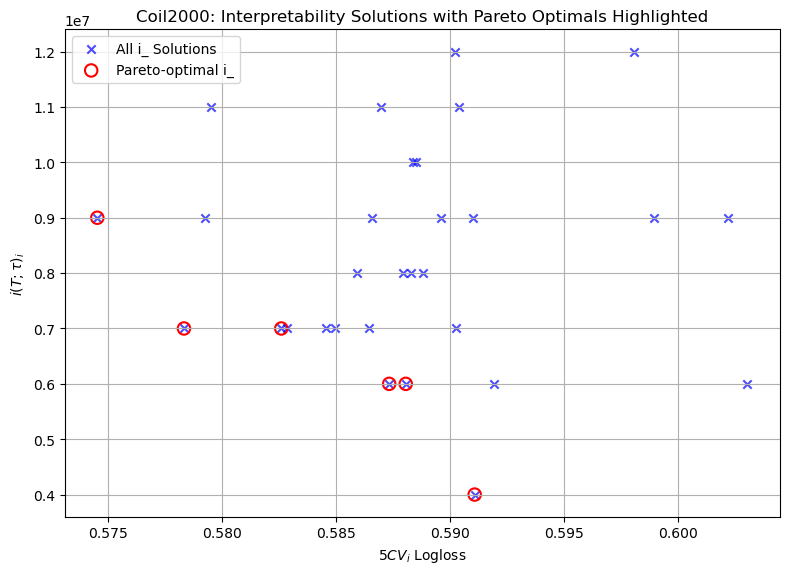

In [237]:
# 1. Load the CSV
df = pd.read_csv(file_path_todo)

# 2. Filter Coil2000 rows (if needed; skip if file is only Coil2000)
coil = df[df["dataset"] == "coil2000.csv"].reset_index(drop=True)

# 3. Select only the i_ columns plus the run index
i_cols = [
    "run",
    "i_5CV_logloss",
    "i_TST_logloss",
    "i_geo_complexity",
    "i_tree_nfs"
]
df_i = coil[i_cols].copy()

# 4. Compute Pareto-frontier among i_ solutions (minimize both metrics)
pareto_mask = np.ones(len(df_i), dtype=bool)
for i in range(len(df_i)):
    if not pareto_mask[i]:
        continue
    dominated = (
        (df_i["i_5CV_logloss"] <= df_i.loc[i, "i_5CV_logloss"]) &
        (df_i["i_geo_complexity"] <= df_i.loc[i, "i_geo_complexity"])
    )
    dominated.iloc[i] = False
    if dominated.any():
        pareto_mask[i] = False

pareto_i = df_i[pareto_mask].reset_index(drop=True)

# 5. Plot all i_ solutions and highlight Pareto-optimal points
plt.figure(figsize=(8, 6))
plt.scatter(
    df_i["i_5CV_logloss"],
    df_i["i_geo_complexity"],
    marker='x',
    color='blue',
    alpha=0.7,
    label='All i_ Solutions'
)
plt.scatter(
    pareto_i["i_5CV_logloss"],
    pareto_i["i_geo_complexity"],
    facecolors='none',
    edgecolors='red',
    s=80,
    linewidths=1.5,
    label='Pareto-optimal i_'
)
x_label = rf'$5CV_i$ Logloss'
y_label = rf'$i(T;\tau)_i$'
plt.xlabel(x_label)
plt.ylabel(y_label)
# plt.xlabel("i_5CV_logloss")
# plt.ylabel("i_geo_complexity")
plt.title("Coil2000: Interpretability Solutions with Pareto Optimals Highlighted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'Pareto_interpretabily_coil2000.png', dpi=600)
plt.show()


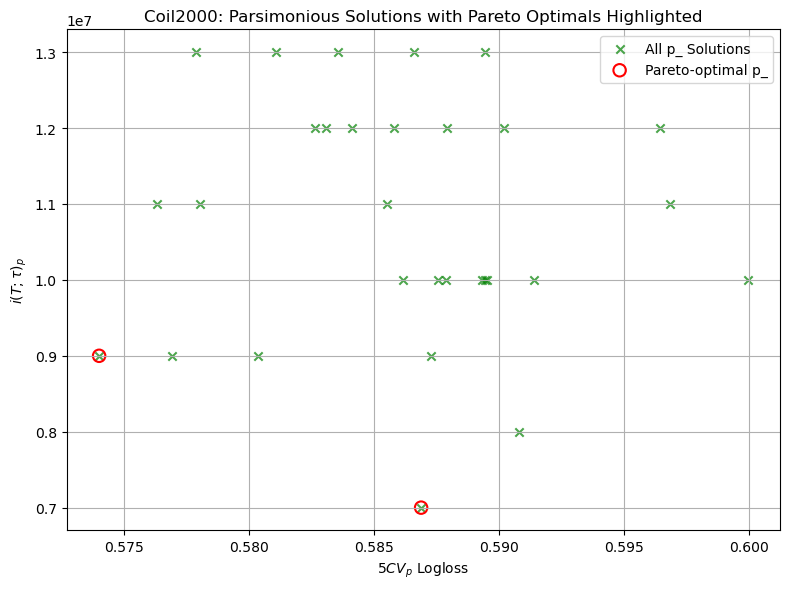

In [238]:
# 1. Load the CSV
df = pd.read_csv(file_path_todo)

# 2. Filter Coil2000 rows (if needed; skip if file is only Coil2000)
coil = df[df["dataset"] == "coil2000.csv"].reset_index(drop=True)

# 3. Select only the p_ columns plus the run index
p_cols = [
    "run",
    "p_5CV_logloss",
    "p_TST_logloss",
    "p_geo_complexity",
    "p_tree_nfs"
]
df_p = coil[p_cols].copy()

# 4. Compute Pareto-frontier among p_ solutions (minimize both metrics)
pareto_mask_p = np.ones(len(df_p), dtype=bool)
for i in range(len(df_p)):
    if not pareto_mask_p[i]:
        continue
    dominated = (
        (df_p["p_5CV_logloss"] <= df_p.loc[i, "p_5CV_logloss"]) &
        (df_p["p_geo_complexity"] <= df_p.loc[i, "p_geo_complexity"])
    )
    dominated.iloc[i] = False
    if dominated.any():
        pareto_mask_p[i] = False

pareto_p = df_p[pareto_mask_p].reset_index(drop=True)

# 5. Plot all p_ solutions and highlight Pareto-optimal points
plt.figure(figsize=(8, 6))
plt.scatter(
    df_p["p_5CV_logloss"],
    df_p["p_geo_complexity"],
    marker='x',
    color='green',
    alpha=0.7,
    label='All p_ Solutions'
)
plt.scatter(
    pareto_p["p_5CV_logloss"],
    pareto_p["p_geo_complexity"],
    facecolors='none',
    edgecolors='red',
    s=80,
    linewidths=1.5,
    label='Pareto-optimal p_'
)
x_label = rf'$5CV_p$ Logloss'
y_label = rf'$i(T;\tau)_p$'
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Coil2000: Parsimonious Solutions with Pareto Optimals Highlighted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'Pareto_parsimonious_coil2000.png', dpi=600)
plt.show()

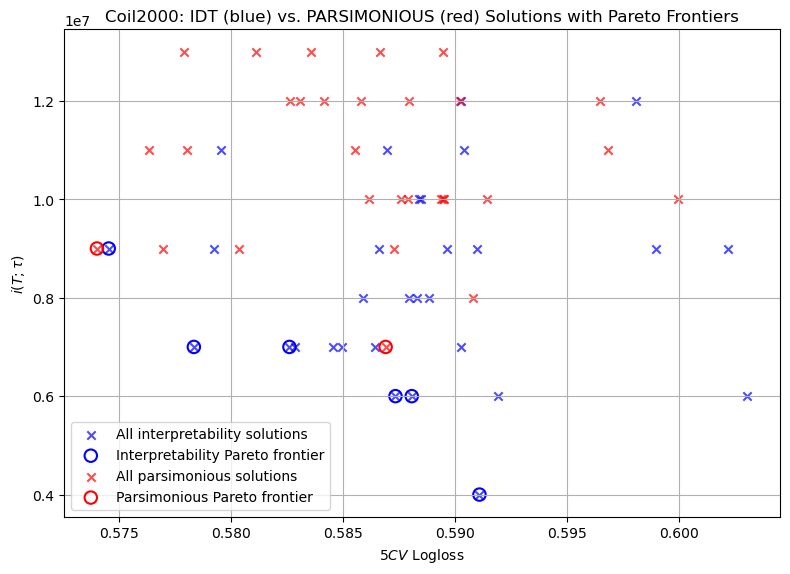

In [239]:
# 1. Load the CSV (replace with the actual filepath if needed)
df = pd.read_csv(file_path_todo)

# 2. If the file contains multiple datasets, filter for Coil2000 rows
#    (skip this step if the file only has Coil2000)
coil = df[df["dataset"] == "coil2000.csv"].reset_index(drop=True)

# 3. Extract the i_ and p_ subsets
i_cols = ["run", "i_5CV_logloss", "i_geo_complexity"]
p_cols = ["run", "p_5CV_logloss", "p_geo_complexity"]
df_i = coil[i_cols].copy()
df_p = coil[p_cols].copy()

# 4. Compute Pareto-frontier among i_ solutions (minimize both metrics)
pareto_mask_i = np.ones(len(df_i), dtype=bool)
for i in range(len(df_i)):
    if not pareto_mask_i[i]:
        continue
    dominated_i = (
        (df_i["i_5CV_logloss"] <= df_i.loc[i, "i_5CV_logloss"]) &
        (df_i["i_geo_complexity"] <= df_i.loc[i, "i_geo_complexity"])
    )
    dominated_i.iloc[i] = False
    if dominated_i.any():
        pareto_mask_i[i] = False
pareto_i = df_i[pareto_mask_i].reset_index(drop=True)

# 5. Compute Pareto-frontier among p_ solutions
pareto_mask_p = np.ones(len(df_p), dtype=bool)
for i in range(len(df_p)):
    if not pareto_mask_p[i]:
        continue
    dominated_p = (
        (df_p["p_5CV_logloss"] <= df_p.loc[i, "p_5CV_logloss"]) &
        (df_p["p_geo_complexity"] <= df_p.loc[i, "p_geo_complexity"])
    )
    dominated_p.iloc[i] = False
    if dominated_p.any():
        pareto_mask_p[i] = False
pareto_p = df_p[pareto_mask_p].reset_index(drop=True)

# 6. Plot all points and highlight Pareto-optimal ones
plt.figure(figsize=(8, 6))

# i_ solutions: blue crosses
plt.scatter(
    df_i["i_5CV_logloss"],
    df_i["i_geo_complexity"],
    marker='x',
    color='blue',
    alpha=0.7,
    label='All interpretability solutions'
)
# i_ Pareto: blue circles
plt.scatter(
    pareto_i["i_5CV_logloss"],
    pareto_i["i_geo_complexity"],
    facecolors='none',
    edgecolors='blue',
    s=80,
    linewidths=1.5,
    label='Interpretability Pareto frontier'
)

# p_ solutions: red crosses
plt.scatter(
    df_p["p_5CV_logloss"],
    df_p["p_geo_complexity"],
    marker='x',
    color='red',
    alpha=0.7,
    label='All parsimonious solutions'
)
# p_ Pareto: red circles
plt.scatter(
    pareto_p["p_5CV_logloss"],
    pareto_p["p_geo_complexity"],
    facecolors='none',
    edgecolors='red',
    s=80,
    linewidths=1.5,
    label='Parsimonious Pareto frontier'
)
x_label = rf'$5CV$ Logloss'
y_label = rf'$i(T;\tau)$'
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Coil2000: IDT (blue) vs. PARSIMONIOUS (red) Solutions with Pareto Frontiers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'Pareto_idt_vs_parsimonious_coil2000.png', dpi=600)
plt.show()


# Arbol de Decision

In [240]:
# 1. Load the CSV (replace with the actual filepath if needed)
df = pd.read_csv(file_path_todo)

# 2. If the file contains multiple datasets, filter for Coil2000 rows
#    (skip this step if the file only has Coil2000)
coil = df[df["dataset"] == "coil2000.csv"].reset_index(drop=True)
selec = coil[coil.run.isin(pareto_i.run)]
selec

,dataset,nrows,ncols,run,seed,i_5CV_logloss,p_5CV_logloss,i_TST_logloss,p_TST_logloss,i_geo_complexity,...,i_l,p_l,i_f,p_f,i_tree_nfs,p_tree_nfs,i_tree_used_fs,p_tree_used_fs,i_selected_fs,p_selected_fs
3,coil2000.csv,9822,86,4,4936,0.582606,0.581102,0.591739,0.587354,7.000033e+06,...,9,15,5,6,5,6,['MOPLLAAG' 'MBERBOER' 'MINKM30' 'PPERSAUT' 'P...,['MOSTYPE' 'MGODOV' 'MOPLLAAG' 'MINKM30' 'PPER...,['MAANTHUI' 'MGEMOMV' 'MGEMLEEF' 'MOSHOOFD' 'M...,['MOSTYPE' 'MAANTHUI' 'MGODOV' 'MFALLEEN' 'MFG...
7,coil2000.csv,9822,86,7,8638,0.574546,0.574020,0.635243,0.635243,9.000033e+06,...,12,12,10,10,10,10,['MRELGE' 'MOPLLAAG' 'MBERBOER' 'MBERMIDD' 'MH...,['MRELGE' 'MOPLLAAG' 'MBERBOER' 'MBERMIDD' 'MH...,['MOSTYPE' 'MGEMOMV' 'MRELGE' 'MFWEKIND' 'MOPL...,['MOSTYPE' 'MAANTHUI' 'MGODPR' 'MRELGE' 'MOPLL...
14,coil2000.csv,9822,86,14,17276,0.591080,0.589514,0.605061,0.624618,4.000033e+06,...,7,11,6,5,6,5,['MINKM30' 'MINKGEM' 'PPERSAUT' 'PBRAND' 'AWAL...,['MOSTYPE' 'MINKM30' 'MINKGEM' 'PPERSAUT' 'PBR...,['MAANTHUI' 'MGEMOMV' 'MGEMLEEF' 'MFALLEEN' 'M...,['MOSTYPE' 'MGODRK' 'MINKM30' 'MINKGEM' 'PPERS...
20,coil2000.csv,9822,86,20,24680,0.578343,0.576948,0.602410,0.586590,7.000033e+06,...,11,12,9,8,9,8,['MOSTYPE' 'MGODOV' 'MRELGE' 'MBERBOER' 'MINKM...,['MOSTYPE' 'MGODOV' 'MRELGE' 'MBERBOER' 'MHHUU...,['MOSTYPE' 'MAANTHUI' 'MGEMOMV' 'MGODOV' 'MREL...,['MOSTYPE' 'MAANTHUI' 'MGEMOMV' 'MOSHOOFD' 'MG...
23,coil2000.csv,9822,86,23,28382,0.588061,0.586896,0.598434,0.596330,6.000033e+06,...,7,8,6,7,6,7,['MOSTYPE' 'MGODGE' 'MAUT1' 'MINKM30' 'PPERSAU...,['MGODGE' 'MOPLLAAG' 'MBERARBG' 'MAUT1' 'MINKM...,['MOSTYPE' 'MAANTHUI' 'MGEMOMV' 'MGODRK' 'MGOD...,['MAANTHUI' 'MGEMOMV' 'MGODGE' 'MOPLLAAG' 'MBE...
27,coil2000.csv,9822,86,27,33318,0.587335,0.580377,0.606410,0.600961,6.000033e+06,...,9,11,6,7,6,7,['MGODGE' 'MOPLLAAG' 'MINKM30' 'PPERSAUT' 'PBR...,['MOSTYPE' 'MOPLLAAG' 'MHHUUR' 'MINKM30' 'PPER...,['MAANTHUI' 'MGEMOMV' 'MGODGE' 'MRELGE' 'MRELS...,['MOSTYPE' 'MGEMOMV' 'MOPLLAAG' 'MSKC' 'MHHUUR...


In [241]:
FILA = 20
run = selec.loc[FILA].run
best_modelo = selec.loc[FILA].i_best_model
i_selected_fs = selec.loc[FILA].i_selected_fs
i_tree_nfs = selec.loc[FILA].i_tree_nfs
i_5CV_logloss = selec.loc[FILA].i_5CV_logloss
i_geo_complexity = selec.loc[FILA].i_geo_complexity
print(run, i_5CV_logloss, i_geo_complexity, i_selected_fs, i_tree_nfs)
print(best_modelo)


20 0.578343 7000033.255997162 ['MOSTYPE' 'MAANTHUI' 'MGEMOMV' 'MGODOV' 'MRELGE' 'MFWEKIND' 'MBERBOER'
 'MBERARBG' 'MSKB1' 'MSKB2' 'MINKM30' 'MINK3045' 'MINK4575' 'MINK7512'
 'MINK123M' 'MINKGEM' 'PWAPART' 'PPERSAUT' 'PVRAAUT' 'PAANHANG' 'PTRACTOR'
 'PBROM' 'PLEVEN' 'PPERSONG' 'PBRAND' 'PZEILPL' 'PPLEZIER' 'AWAPART'
 'APERSAUT' 'ABESAUT' 'AVRAAUT' 'ABROM' 'ALEVEN' 'AGEZONG' 'ABRAND'
 'AFIETS' 'ABYSTAND'] 9
DecisionTreeClassifier(ccp_alpha=0.002441388031358405, class_weight='balanced',
                       max_depth=4, min_samples_leaf=101, min_samples_split=361,
                       random_state=1234)


In [242]:
FOLDER_DATASETS = './datasets/'
name_file = 'coil2000.csv'
df = pd.read_csv(FOLDER_DATASETS + name_file)
nrows = df.shape[0]
ncols = df.shape[1]
X = df.drop(columns='target_end')
y = df.pop('target_end')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1234 * run
)
total_feats = X.shape[1]
input_names = X.columns

# Keep only selected features
s = i_selected_fs  # e.g. "['MAANTHUI' 'MGEMOMV' ... 'ABYSTAND']"

# Extract whatever appears between single quotes:
features = re.findall(r"'([^']+)'", s)

X_train_sel = X_train[features]
X_test_sel  = X_test[features]

# Instantiate the model from the string
# Make sure DecisionTreeClassifier is in scope
model = eval(best_modelo)

# Train
model.fit(X_train_sel, y_train)

preds_i = model.predict_proba(X_test_sel)[:, 1]
i_TST   = round(log_loss(y_test, preds_i), 6)
nfs_i   = len(features)
TAU = 0.90
i_geo   = interpretability_score(model, nfs_i, 
                                X_train_sel,
                                y_train, TAU)
i_nfs_c  = decision_tree_complexity(model, nfs_i) // 1e9
print(i_TST, i_geo, i_nfs_c)
print(features)
# print(i_selected_fs)


0.60241 8000033.6044541905 37.0
['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGODOV', 'MRELGE', 'MFWEKIND', 'MBERBOER', 'MBERARBG', 'MSKB1', 'MSKB2', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'PWAPART', 'PPERSAUT', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PBROM', 'PLEVEN', 'PPERSONG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'AWAPART', 'APERSAUT', 'ABESAUT', 'AVRAAUT', 'ABROM', 'ALEVEN', 'AGEZONG', 'ABRAND', 'AFIETS', 'ABYSTAND']


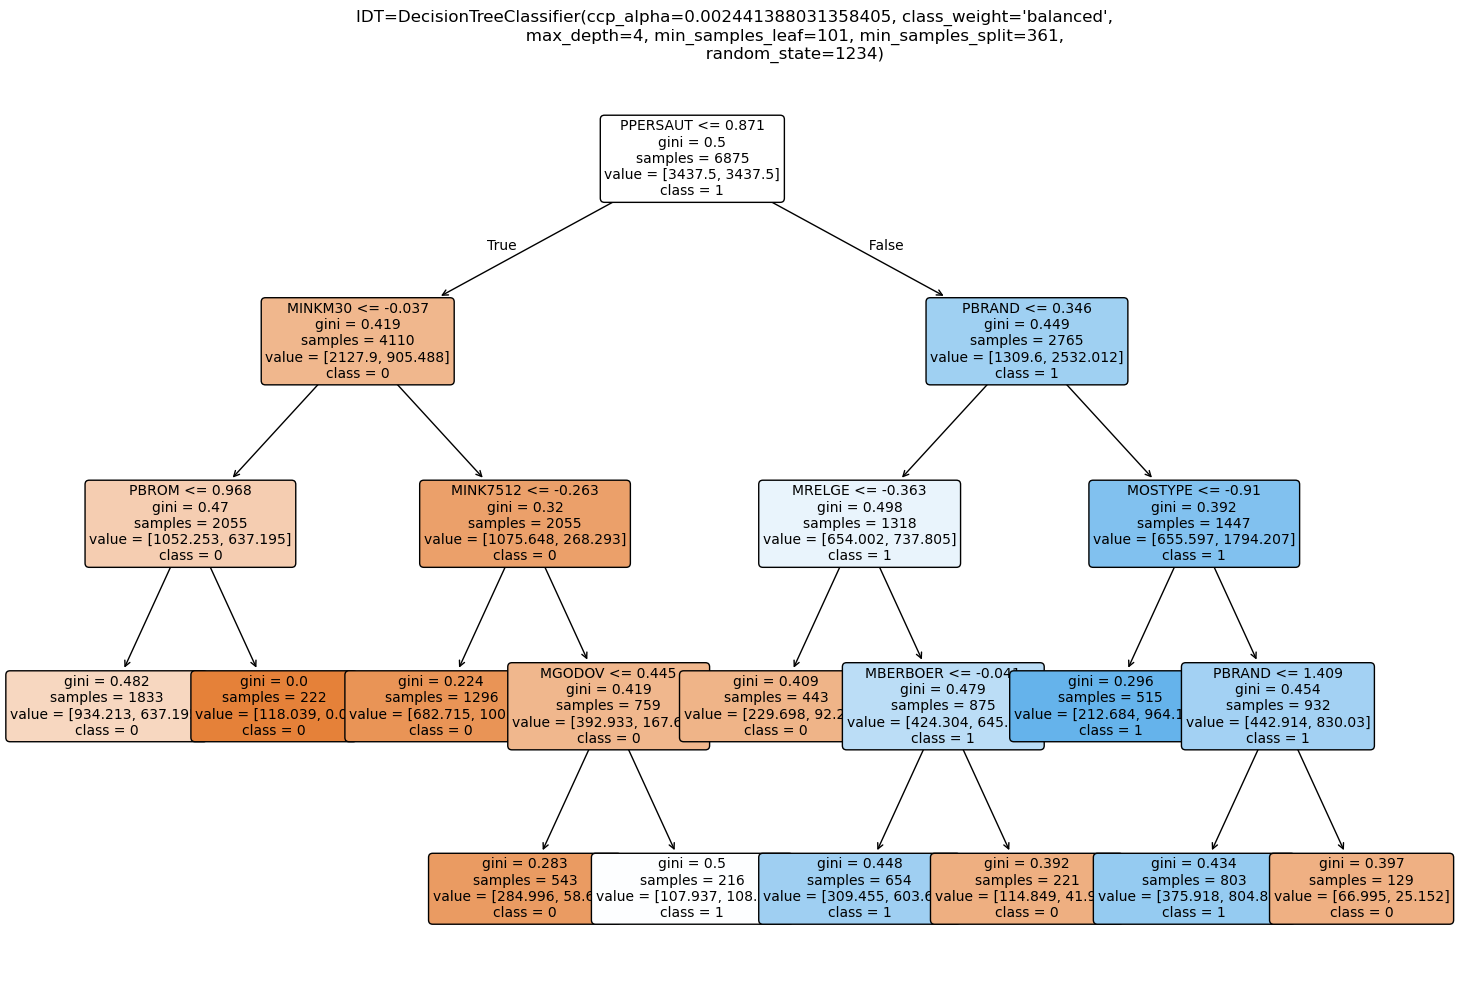

In [243]:
# 1) Make sure you still have X_train_sel, and its column names:
feature_names = X_train_sel.columns.tolist()  # e.g. ['MAANTHUI','MGEMOMV', ]

# 2) (Optionally) Create a figure of a given size:
plt.figure(figsize=(15, 10))  # adjust width/height in inches

# 3) Plot the tree. We pass in:
#     - model: your trained DecisionTreeClassifier
#     - feature_names: list of column names to label each split
#     - class_names: array of class labels (e.g. model.classes_)
#     - filled=True to color each node by the majority class
#     - rounded=True to round the corners of the boxes
tree.plot_tree(
    model,
    feature_names=feature_names,
    class_names=[str(c) for c in model.classes_],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title(f'IDT={best_modelo}')
plt.tight_layout()
plt.savefig(f'Best_Tree_coil2000.png', dpi=600)
plt.show()